# NARPS

In [1]:
%load_ext autoreload
%autoreload 2

import json
from pathlib import Path
from itertools import chain

import numpy as np
import pandas as pd

from nilearn.plotting import plot_design_matrix

import bids
from bids.modeling import BIDSStatsModelsGraph
from bids.layout import BIDSLayout

def api(obj):
    return {attr: getattr(obj, attr) for attr in dir(obj) if not attr[0] == '_'}

In [2]:
layout = BIDSLayout('./ds001734/', database_path="./ds001734.db")

In [3]:
json_file = './model-narps_smdl.json'
spec = json.loads(Path(json_file).read_text())
spec

{'Name': 'NARPS',
 'Description': 'NARPS Analysis model',
 'BIDSModelVersion': '1.0.0',
 'Input': {'task': 'MGT'},
 'Nodes': [{'Level': 'Run',
   'Name': 'run',
   'GroupBy': ['run', 'subject'],
   'Transformations': {'Transformer': 'pybids-transforms-v1',
    'Instructions': [{'Name': 'Threshold',
      'Input': ['gain'],
      'Binarize': True,
      'Output': ['trials']},
     {'Name': 'Scale',
      'Input': ['gain', 'loss', 'RT'],
      'Demean': True,
      'Rescale': False,
      'Output': ['gain', 'loss', 'demeaned_RT']},
     {'Name': 'Convolve',
      'Model': 'spm',
      'Input': ['trials', 'gain', 'loss', 'demeaned_RT']}]},
   'Model': {'X': ['trials', 'gain', 'loss', 'demeaned_RT', 1], 'Type': 'glm'},
   'DummyContrasts': {'Conditions': ['trials', 'gain', 'loss'], 'Test': 't'}},
  {'Level': 'Subject',
   'Name': 'subject',
   'GroupBy': ['subject', 'contrast'],
   'Model': {'X': [1], 'Type': 'meta'},
   'DummyContrasts': {'Test': 't'}},
  {'Level': 'Dataset',
   'Name': '

In [4]:
spec['Input'] = {
    'task': 'MGT',
    'subject': ['001', '002', '003']
}

In [5]:
graph = BIDSStatsModelsGraph(layout, spec)

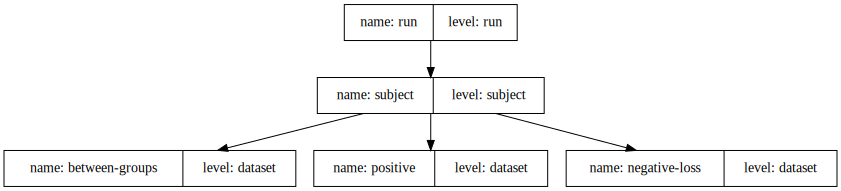

In [6]:
graph.write_graph(format='svg')

In [7]:
root_node = graph.root_node

In [8]:
try:
    graph.load_collections()
except ValueError:
    graph.load_collections(scan_length=453)  # TR = 1, nvols = 453

In [9]:
specs = root_node.run(group_by=root_node.group_by, force_dense=False)

In [10]:
api(specs[0])

{'X':        trials      gain      loss   demeaned_RT  intercept
 0    0.000002 -0.000020 -0.000011  7.939675e-07        1.0
 1   -0.000005  0.000056  0.000032 -2.276861e-06        1.0
 2    0.000014 -0.000159 -0.000091  6.446336e-06        1.0
 3   -0.000037  0.000408  0.000235 -1.654103e-05        1.0
 4    0.000073 -0.000812 -0.000468  3.296583e-05        1.0
 ..        ...       ...       ...           ...        ...
 448  0.729063  8.015666  5.652929 -2.061146e-01        1.0
 449  0.576339  7.628444  4.549625 -1.434993e-01        1.0
 450  0.397427  6.338474  3.218710 -8.201623e-02        1.0
 451  0.237071  4.844265  2.008481 -3.181046e-02        1.0
 452  0.097324  3.315304  0.939883  8.506043e-03        1.0
 
 [453 rows x 5 columns],
 'contrasts': [ContrastInfo(name='intercept', conditions=['intercept'], weights=[1], test='t', entities={'run': 1, 'subject': '001', 'contrast': 'intercept'}),
  ContrastInfo(name='loss', conditions=['loss'], weights=[1], test='t', entities={'run':

In [11]:
specs[0]

<AxesSubplot: label='conditions', ylabel='scan number'>

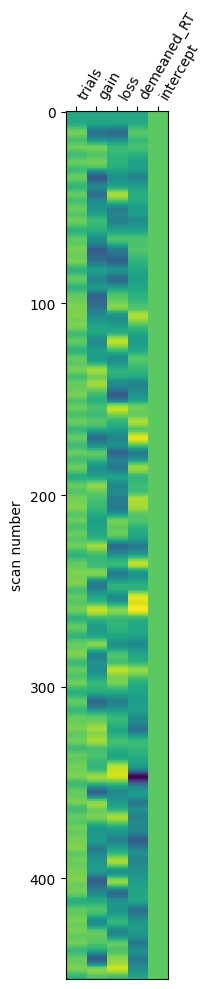

In [12]:
plot_design_matrix(specs[0].X)

In [13]:
specs[0].entities

{'run': 1, 'subject': '001'}

In [14]:
specs[0].metadata

,BandwidthPerPixelPhaseEncode,CogAtlasID,EchoTime,EffectiveEchoSpacing,FlipAngle,MagneticFieldStrength,Manufacturer,ManufacturersModelName,MultibandAccelerationFactor,PhaseEncodingDirection,...,TaskDescription,TaskName,datatype,duration,extension,onset,run,subject,suffix,task
0,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,0.0,1,001,bold,MGT
1,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,1.0,1,001,bold,MGT
2,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,2.0,1,001,bold,MGT
3,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,3.0,1,001,bold,MGT
4,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,4.0,1,001,bold,MGT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,448.0,1,001,bold,MGT
449,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,449.0,1,001,bold,MGT
450,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,450.0,1,001,bold,MGT
451,34.305,http://www.cognitiveatlas.org/id/trm_4cacee4a1...,0.03,0.000275,68,3,SIEMENS,Prisma,4,j-,...,Mixed gambles task,MGT,func,1.0,.nii.gz,451.0,1,001,bold,MGT


In [15]:
bold = layout.get(**specs[0].entities, suffix='bold', extension='.nii.gz')[0]

In [16]:
# import nilearn.glm
# l1m = nilearn.glm.first_level.FirstLevelModel()
# l1m.fit(bold.get_image(), design_matrices=specs[0].X)

In [17]:
next_node = root_node.children[0].destination

In [18]:
next_node.group_by

['subject', 'contrast']

In [19]:
root_node.children[0].filter

{}

In [20]:
contrasts = list(chain(*[s.contrasts for s in specs]))
sub_specs = next_node.run(contrasts, group_by=next_node.group_by)

In [21]:
api(sub_specs[3])

{'X':    intercept
 0          1
 1          1
 2          1
 3          1,
 'contrasts': [ContrastInfo(name='demeaned_RT', conditions=['intercept'], weights=[1], test='t', entities={'contrast': 'demeaned_RT', 'subject': '001'})],
 'data':    intercept
 0          1
 1          1
 2          1
 3          1,
 'entities': {'contrast': 'demeaned_RT', 'subject': '001'},
 'force_dense': True,
 'invalid_contrasts': 'drop',
 'metadata':       contrast  run subject
 0  demeaned_RT    1     001
 1  demeaned_RT    2     001
 2  demeaned_RT    3     001
 3  demeaned_RT    4     001,
 'model_spec': <bids.modeling.model_spec.GLMMSpec at 0x7f720b941c70>,
 'node': <BIDSStatsModelsNode[subject] subject>,
 'sampling_rate': 'TR'}

In [22]:
ds1_node = next_node.children[1].destination
api(ds1_node)

{'add_child': <bound method BIDSStatsModelsNode.add_child of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'add_collections': <bound method BIDSStatsModelsNode.add_collections of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'add_parent': <bound method BIDSStatsModelsNode.add_parent of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'children': [],
 'contrasts': [{'name': 'negative',
   'condition_list': [1],
   'weights': [-1],
   'test': 't'}],
 'dummy_contrasts': False,
 'get_collections': <bound method BIDSStatsModelsNode.get_collections of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'group_by': ['contrast', 'group'],
 'level': 'dataset',
 'model': {'x': [1]},
 'name': 'negative-loss',
 'parents': [BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[subject] subject>, destination=<BIDSStatsModelsNode[dataset] negative-loss>, filter={'contrast': ['loss']})],
 'run': <bound method BIDSStatsModelsNode.run of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'transformations': {'tran

In [23]:
next_node.children[1].filter

{'contrast': ['loss']}

In [24]:
sub_contrasts = list(chain(*[s.contrasts for s in sub_specs]))
ds1_specs = ds1_node.run(sub_contrasts, group_by=ds1_node.group_by, **next_node.children[1].filter)

In [25]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [26]:
ds1_specs[0].X

,intercept
0,1
1,1


In [27]:
pd.concat((ds1_specs[0].data, ds1_specs[0].metadata), axis=1)

,intercept,contrast,subject
0,1,loss,001
1,1,loss,003


In [28]:
ds1_specs[0].contrasts

[ContrastInfo(name='loss_negative', conditions=['intercept'], weights=[-1], test='t', entities={'contrast': 'loss_negative', 'group': 'equalIndifference'})]

In [29]:
ds0_node = next_node.children[0].destination 
ds0_specs = ds0_node.run(sub_contrasts, group_by=ds0_node.group_by)

In [30]:
ds0_specs

In [31]:
ds0_specs[1].X

,intercept
0,1
1,1


In [32]:
pd.concat((ds0_specs[0].data, ds0_specs[0].metadata), axis=1)

,intercept,contrast,subject
0,1,intercept,001
1,1,intercept,003


In [33]:
ds2_node = next_node.children[2].destination 
filters = next_node.children[2].filter or {}
print(filters)
ds2_specs = ds2_node.run(sub_contrasts, group_by=ds2_node.group_by, **filters)
print(ds2_specs)

{'contrast': ['loss']}


In [34]:
api(ds2_specs[0])

{'X':    C(group)[T.equalIndifference]  C(group)[T.equalRange]
 0                              1                       0
 1                              0                       1
 2                              1                       0,
 'contrasts': [ContrastInfo(name='loss_range_vs_indiference', conditions=['C(group)[T.equalRange]', 'C(group)[T.equalIndifference]'], weights=[1, -1], test='t', entities={'contrast': 'loss_range_vs_indiference'})],
 'data':    intercept              group
 0          1  equalIndifference
 1          1         equalRange
 2          1  equalIndifference,
 'entities': {'contrast': 'loss'},
 'force_dense': True,
 'invalid_contrasts': 'drop',
 'metadata':   contrast subject        suffix
 0     loss     001  participants
 1     loss     002  participants
 2     loss     003  participants,
 'model_spec': <bids.modeling.model_spec.GLMMSpec at 0x7f720b96e3d0>,
 'node': <BIDSStatsModelsNode[dataset] between-groups>,
 'sampling_rate': 'TR'}

In [35]:
ds2_specs[0].X

,C(group)[T.equalIndifference],C(group)[T.equalRange]
0,1,0
1,0,1
2,1,0


In [36]:
pd.concat((ds2_specs[0].data, ds2_specs[0].metadata), axis=1)

,intercept,group,contrast,subject,suffix
0,1,equalIndifference,loss,001,participants
1,1,equalRange,loss,002,participants
2,1,equalIndifference,loss,003,participants


In [37]:
api(ds1_node)

{'add_child': <bound method BIDSStatsModelsNode.add_child of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'add_collections': <bound method BIDSStatsModelsNode.add_collections of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'add_parent': <bound method BIDSStatsModelsNode.add_parent of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'children': [],
 'contrasts': [{'name': 'negative',
   'condition_list': [1],
   'weights': [-1],
   'test': 't'}],
 'dummy_contrasts': False,
 'get_collections': <bound method BIDSStatsModelsNode.get_collections of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'group_by': ['contrast', 'group'],
 'level': 'dataset',
 'model': {'x': [1]},
 'name': 'negative-loss',
 'parents': [BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[subject] subject>, destination=<BIDSStatsModelsNode[dataset] negative-loss>, filter={'contrast': ['loss']})],
 'run': <bound method BIDSStatsModelsNode.run of <BIDSStatsModelsNode[dataset] negative-loss>>,
 'transformations': {'tran

In [38]:
graph.nodes

OrderedDict([('run', <BIDSStatsModelsNode[run] run>),
             ('subject', <BIDSStatsModelsNode[subject] subject>),
             ('between-groups', <BIDSStatsModelsNode[dataset] between-groups>),
             ('positive', <BIDSStatsModelsNode[dataset] positive>),
             ('negative-loss', <BIDSStatsModelsNode[dataset] negative-loss>)])

In [39]:
graph.root_node.children

[BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[run] run>, destination=<BIDSStatsModelsNode[subject] subject>, filter={})]

In [40]:
graph.root_node.children[0].destination.children

[BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[subject] subject>, destination=<BIDSStatsModelsNode[dataset] positive>, filter={}),
 BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[subject] subject>, destination=<BIDSStatsModelsNode[dataset] negative-loss>, filter={'contrast': ['loss']}),
 BIDSStatsModelsEdge(source=<BIDSStatsModelsNode[subject] subject>, destination=<BIDSStatsModelsNode[dataset] between-groups>, filter={'contrast': ['loss']})]

In [41]:
graph.root_node.children[0].destination.children[2].destination.name

'between-groups'